In [2]:
import csv
import operator

with open("./data/card.csv", 'r', encoding='utf-8') as f:
  data = csv.reader(f)
  next(data)
  data = list(data)

data[0]

['2019/10/12  09:13',
 '01972753',
 '본',
 'S&',
 '185',
 '네이버파이낸셜(주)',
 '546800 ',
 '일시불(A)',
 '부분취소']

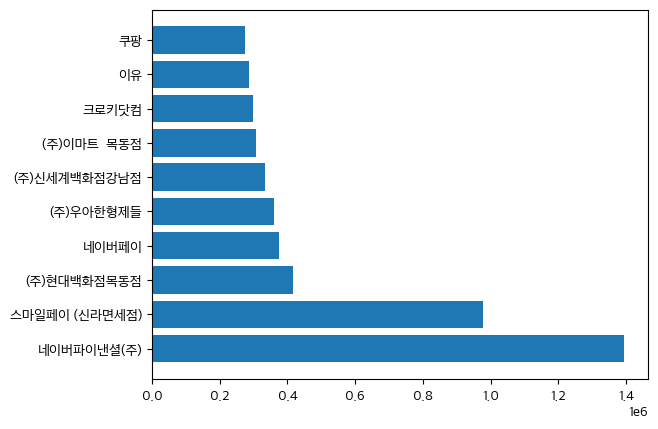

In [ ]:
import matplotlib.pyplot as plt

spending = {}

for row in data:
  if row[-1] == '전표매입':
    store, payment = row[-4], int(row[-3])

    if store in spending.keys():
      spending[store] += payment
    else:
      spending[store] = payment

top10 = sorted(spending.items(), key=operator.itemgetter(1), reverse=True)[:10]

top10_store = []
top10_amount = []

for t in top10:
  top10_store.append(t[0])
  top10_amount.append(t[1])

plt.rc('font', family='Apple SD Gothic Neo')
plt.barh(top10_store, top10_amount)
plt.show()

In [11]:

import csv

with open("./data/LOCAL_PEOPLE_DONG_201912.csv", 'r', encoding='utf-8') as f:
  data = csv.reader(f)
  next(data)
  data = list(data)

In [ ]:
for row in data:
  for i in range(1, 32):
    if i <= 2:
      row[i] = int(row[i])
    else:
      row[i] = float(row[i])

print(data[0])

['20191201', 0, 11215710, 45694.9988, 452.3937, 208.7971, 1267.7678, 5642.9235, 5433.6801, 2494.5993, 1691.4831, 1042.7096, 1058.3378, 895.4639, 875.9212, 601.9097, 496.2165, 850.682, 388.4005, 180.3721, 1586.7039, 6973.6176, 4259.7022, 2036.1446, 1285.42, 794.6241, 833.7179, 772.1417, 773.2152, 827.1455, 565.5378, 1405.3707, '']


In [12]:
with open("./data/dong_code.csv", "r", encoding="utf-8") as f:
  code_data = csv.reader(f)
  next(code_data)
  next(code_data)
  code_data = list(code_data)

In [14]:
for row in code_data:
  row[1] = int(row[1])

print(code_data[0])

['1101053', 11110530, '서울', '종로구', '사직동']


In [15]:
dong_name = input()

for row in code_data:
  if row[-1] == dong_name:
    dong_code = row[1]

print(dong_name, dong_code)

사직동 11110530


In [23]:
import matplotlib.pyplot as plt

population = [0 for _ in range(24)]

for row in data:
  if row[2] == dong_code:
    time, p = row[1], row[3]

    population[time] += p

population = [p/31 for p in population]

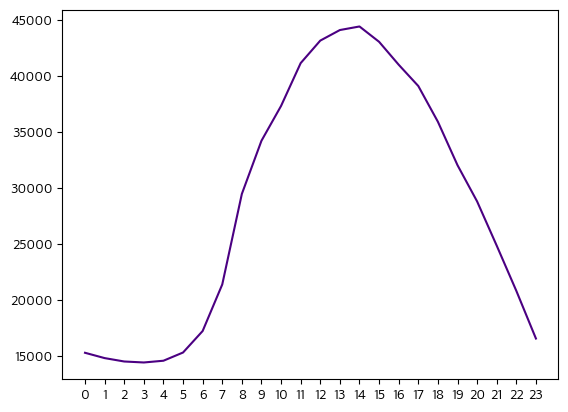

In [27]:
plt.rc('font', family='Apple SD Gothic Neo')
plt.plot(range(24), population, color='indigo')
plt.xticks(range(24), range(24))
plt.show()

In [31]:
import datetime

datetime.date(2019, 12, 15).weekday()

6

In [ ]:
weekday = [0 for _ in range(24)]
weekend = [0 for _ in range(24)]

for row in data :
  if row[2] == dong_code :
    time, p = row[1], row[3]

    year, mon, day = int(row[0][:4]), int(row[0][4:6]), int(row[0][6:])
  
    num = datetime.date(year, mon, day).weekday()
  
    if num < 5 :
      weekday[time] += p
    else :
      weekend[time] += p